In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from hyperopt.pyll import scope
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# 1. On drop la variable de consommation.

In [2]:
pData = pd.read_parquet('prediction.parquet')
pDataLog = pd.read_parquet('prediction_log.parquet')
pDataWithoutStarScore = pd.read_parquet('prediction.parquet')

pData = pData.drop(['SiteEnergyUse(kBtu)'], axis=1)
pDataWithoutStarScore = pData.drop(['ENERGYSTARScore'], axis=1)
pDataLog = pDataLog.drop(['SiteEnergyUse(kBtu)'], axis=1)

pData.reset_index(drop=True, inplace=True)
pDataWithoutStarScore.reset_index(drop=True, inplace=True)
pDataLog.reset_index(drop=True, inplace=True)

In [3]:
pDataWithoutStarScore

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,SteamUsed,ElectricityUsed,NaturalGasUsed
0,1,2016,NonResidential,Hotel,98101.0,6.590000e+08,7,DOWNTOWN,47.61220,-122.33799,...,0,88434,Hotel,88434.0,0.0,0.0,249.98,True,True,True
1,2,2016,NonResidential,Hotel,98101.0,6.590002e+08,7,DOWNTOWN,47.61317,-122.33393,...,15064,88502,Hotel,83880.0,15064.0,4622.0,295.86,False,True,True
2,5,2016,NonResidential,Hotel,98101.0,6.590006e+08,7,DOWNTOWN,47.61412,-122.33664,...,0,61320,Hotel,61320.0,0.0,0.0,286.43,True,True,True
3,10,2016,NonResidential,Hotel,98101.0,6.600008e+08,7,DOWNTOWN,47.61390,-122.33283,...,0,83008,Hotel,81352.0,0.0,0.0,176.14,False,True,True
4,11,2016,NonResidential,Other,98101.0,6.600010e+08,7,DOWNTOWN,47.61327,-122.33136,...,0,102761,Other - Entertainment/Public Assembly,102761.0,0.0,0.0,221.51,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,50221,2016,Nonresidential COS,Other,98109.0,2.524039e+09,1,DELRIDGE NEIGHBORHOODS,47.54067,-122.37441,...,0,18261,Other - Recreation,18261.0,0.0,0.0,20.33,False,True,True
1232,50223,2016,Nonresidential COS,Other,98109.0,3.558300e+09,2,DOWNTOWN,47.59625,-122.32283,...,0,16000,Other - Recreation,16000.0,0.0,0.0,32.17,False,True,True
1233,50224,2016,Nonresidential COS,Other,98109.0,1.794501e+09,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,...,0,13157,Other - Recreation,7583.0,5574.0,0.0,223.54,False,True,True
1234,50225,2016,Nonresidential COS,Mixed Use Property,98109.0,7.883603e+09,1,GREATER DUWAMISH,47.52832,-122.32431,...,0,14101,Other - Recreation,6601.0,6501.0,484.0,22.11,False,True,True


In [4]:
pData

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,TotalGHGEmissions,SteamUsed,ElectricityUsed,NaturalGasUsed
0,1,2016,NonResidential,Hotel,98101.0,6.590000e+08,7,DOWNTOWN,47.61220,-122.33799,...,88434,Hotel,88434.0,0.0,0.0,60.0,249.98,True,True,True
1,2,2016,NonResidential,Hotel,98101.0,6.590002e+08,7,DOWNTOWN,47.61317,-122.33393,...,88502,Hotel,83880.0,15064.0,4622.0,61.0,295.86,False,True,True
2,5,2016,NonResidential,Hotel,98101.0,6.590006e+08,7,DOWNTOWN,47.61412,-122.33664,...,61320,Hotel,61320.0,0.0,0.0,56.0,286.43,True,True,True
3,10,2016,NonResidential,Hotel,98101.0,6.600008e+08,7,DOWNTOWN,47.61390,-122.33283,...,83008,Hotel,81352.0,0.0,0.0,27.0,176.14,False,True,True
4,11,2016,NonResidential,Other,98101.0,6.600010e+08,7,DOWNTOWN,47.61327,-122.33136,...,102761,Other - Entertainment/Public Assembly,102761.0,0.0,0.0,75.0,221.51,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,50221,2016,Nonresidential COS,Other,98109.0,2.524039e+09,1,DELRIDGE NEIGHBORHOODS,47.54067,-122.37441,...,18261,Other - Recreation,18261.0,0.0,0.0,75.0,20.33,False,True,True
1232,50223,2016,Nonresidential COS,Other,98109.0,3.558300e+09,2,DOWNTOWN,47.59625,-122.32283,...,16000,Other - Recreation,16000.0,0.0,0.0,75.0,32.17,False,True,True
1233,50224,2016,Nonresidential COS,Other,98109.0,1.794501e+09,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,...,13157,Other - Recreation,7583.0,5574.0,0.0,75.0,223.54,False,True,True
1234,50225,2016,Nonresidential COS,Mixed Use Property,98109.0,7.883603e+09,1,GREATER DUWAMISH,47.52832,-122.32431,...,14101,Other - Recreation,6601.0,6501.0,484.0,75.0,22.11,False,True,True


# 2. Création des Dummies datas

Dans le code ci-dessus, nous avons créé des variables dummies à partir du DataFrame `pData` en utilisant la méthode `pd.get_dummies()`. Les variables dummies sont utilisées pour représenter des variables catégorielles sous forme de variables binaires (0 ou 1), ce qui facilite l'analyse et la modélisation des données.

Cette approche permet de transformer des données catégorielles en un format adapté à l'analyse et à la modélisation, facilitant ainsi le travail avec ces données dans le cadre de diverses tâches analytiques.


In [5]:
dummies_data = pd.get_dummies(pData, columns=['Neighborhood', 'PrimaryPropertyType', 'NumberofBuildings', 'NumberofFloors', 'LargestPropertyUseType'])

dummies_data.drop(axis=1, columns=['TotalGHGEmissions', 'OSEBuildingID', 'ZipCode', 'Longitude', 'Latitude', 'BuildingType'], inplace=True)
dummies_data

,DataYear,TaxParcelIdentificationNumber,CouncilDistrictCode,YearBuilt,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,...,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Worship Facility
0,2016,6.590000e+08,7,1927,88434,0,88434,88434.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2016,6.590002e+08,7,1996,103566,15064,88502,83880.0,15064.0,4622.0,...,False,False,False,False,False,False,False,False,False,False
2,2016,6.590006e+08,7,1926,61320,0,61320,61320.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,2016,6.600008e+08,7,1926,83008,0,83008,81352.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,2016,6.600010e+08,7,1926,102761,0,102761,102761.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,2016,2.524039e+09,1,1982,18261,0,18261,18261.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1232,2016,3.558300e+09,2,2004,16000,0,16000,16000.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1233,2016,1.794501e+09,7,1974,13157,0,13157,7583.0,5574.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1234,2016,7.883603e+09,1,1989,14101,0,14101,6601.0,6501.0,484.0,...,False,False,False,False,False,False,False,False,False,False


In [6]:
dummies_data_without_energy_score = pd.get_dummies(pDataWithoutStarScore, columns=['Neighborhood', 'PrimaryPropertyType', 'NumberofBuildings', 'NumberofFloors', 'LargestPropertyUseType'])

dummies_data_without_energy_score.drop(axis=1, columns=['TotalGHGEmissions', 'OSEBuildingID', 'ZipCode', 'Longitude', 'Latitude', 'BuildingType'], inplace=True)
dummies_data_without_energy_score

,DataYear,TaxParcelIdentificationNumber,CouncilDistrictCode,YearBuilt,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,...,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Worship Facility
0,2016,6.590000e+08,7,1927,88434,0,88434,88434.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2016,6.590002e+08,7,1996,103566,15064,88502,83880.0,15064.0,4622.0,...,False,False,False,False,False,False,False,False,False,False
2,2016,6.590006e+08,7,1926,61320,0,61320,61320.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,2016,6.600008e+08,7,1926,83008,0,83008,81352.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,2016,6.600010e+08,7,1926,102761,0,102761,102761.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,2016,2.524039e+09,1,1982,18261,0,18261,18261.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1232,2016,3.558300e+09,2,2004,16000,0,16000,16000.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1233,2016,1.794501e+09,7,1974,13157,0,13157,7583.0,5574.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1234,2016,7.883603e+09,1,1989,14101,0,14101,6601.0,6501.0,484.0,...,False,False,False,False,False,False,False,False,False,False


In [7]:
dummies_data_log = pd.get_dummies(pDataLog, columns=['Neighborhood', 'PrimaryPropertyType', 'NumberofBuildings', 'NumberofFloors', 'LargestPropertyUseType'])

dummies_data_log.drop(axis=1, columns=['TotalGHGEmissions', 'OSEBuildingID', 'ZipCode', 'Longitude', 'Latitude', 'BuildingType'], inplace=True)

# 3. Division des Données en Ensembles d'Entraînement et de Test

Dans ce code, nous utilisons la bibliothèque scikit-learn pour diviser nos données en ensembles d'entraînement et de test, une étape cruciale dans la préparation des données pour la modélisation. Voici ce que nous faisons :

1. **Importation de la Bibliothèque :** Nous commençons par importer la fonction `train_test_split` de la bibliothèque scikit-learn, qui nous permettra de diviser nos données.

2. **Sélection des Variables :** Nous sélectionnons nos variables indépendantes (X) et notre variable dépendante (y). Dans ce cas, toutes les caractéristiques du bâtiment (représentées par `dummies_data`) sont utilisées comme variables indépendantes, et la variable que nous cherchons à prédire est 'TotalGHGEmissions'.

3. **Division des Données :** Ensuite, nous utilisons la fonction `train_test_split` pour diviser nos données en ensembles d'entraînement et de test. Par défaut, 80% des données sont utilisées pour l'entraînement et 20% pour les tests. Le paramètre `random_state` est fixé à 42 pour assurer la reproductibilité des résultats.

4. **Création des Ensembles d'Entraînement et de Test :** Enfin, nous créons deux ensembles de données distincts, `train_data` contenant les données d'entraînement et `test_data` contenant les données de test, en associant les variables indépendantes aux variables dépendantes respectives.

Cette division des données nous permet d'entraîner notre modèle sur un sous-ensemble des données et de l'évaluer sur un autre sous-ensemble, ce qui est essentiel pour évaluer la performance et la généralisation du modèle.


In [8]:
from sklearn.model_selection import train_test_split

# Sélectionner la variable indépendante (X) et la variable dépendante (y)
X = dummies_data #prendre tout ce qui caractérise un batiment
y = pData['TotalGHGEmissions']

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% d'entraînement, 20% de test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = X_train.join(y_train)
test_data = X_test.join(y_test)

In [9]:

X_without_energy_score = dummies_data_without_energy_score
y_without_energy_score = pDataWithoutStarScore['TotalGHGEmissions']

X_train_without_energy_score, X_test_without_energy_score, y_train_without_energy_score, y_test_without_energy_score = train_test_split(X_without_energy_score, y_without_energy_score, test_size=0.2, random_state=42)

train_data_without_energy_score = X_train_without_energy_score.join(y_train_without_energy_score)
test_data_without_energy_score = X_test_without_energy_score.join(y_test_without_energy_score)

In [10]:
# Sélectionner la variable indépendante (X) et la variable dépendante (y)
X_log = dummies_data_log #prendre tout ce qui caractérise un batiment
y_log = pDataLog['TotalGHGEmissions']

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% d'entraînement, 20% de test)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

train_data_log = X_train_log.join(y_train_log)
test_data_log = X_test_log.join(y_test_log)

# 4. Recherche des Meilleurs Hyperparamètres et l'Entraînement d'un Modèle XGBoost

Ce code effectue deux tâches principales : la recherche des meilleurs hyperparamètres pour un modèle XGBoost et l'entraînement du modèle avec ces hyperparamètres optimaux. Voici comment ces tâches sont réalisées :

1. **`objective` - Fonction Objectif :** Cette fonction est utilisée pour évaluer les performances d'un modèle XGBoost avec un ensemble donné d'hyperparamètres. Elle entraîne un modèle XGBoost avec les hyperparamètres spécifiés et calcule les métriques de performance telles que RMSE (Root Mean Square Error) et MAPE (Mean Absolute Percentage Error) entre les prédictions et les valeurs réelles.

2. **`found_best_model` - Recherche des Meilleurs Hyperparamètres :** Cette fonction recherche les meilleurs hyperparamètres pour le modèle XGBoost en utilisant une optimisation bayésienne. Elle définit un espace de recherche d'hyperparamètres avec des plages possibles pour chaque hyperparamètre. Ensuite, elle utilise l'algorithme Tree-structured Parzen Estimator (TPE) pour trouver les hyperparamètres qui minimisent la fonction objectif définie précédemment.

3. **`train_best_model` - Entraînement du Meilleur Modèle :** Une fois les meilleurs hyperparamètres trouvés, cette fonction entraîne un modèle XGBoost avec ces hyperparamètres sur les données d'entraînement et les évalue sur les données de validation. Elle retourne les prédictions du modèle ainsi que le temps nécessaire pour l'entraînement et l'évaluation.

Ce code est utile pour l'optimisation des hyperparamètres et l'entraînement d'un modèle XGBoost de haute performance pour la tâche spécifique. Il est couramment utilisé dans le processus de développement de modèles d'apprentissage automatique pour améliorer les performances prédictives.


In [11]:
def objective(params, train, valid, y_val):
    """
    Create an objectif func for hypt in ordre to found best hyperparameters
    """
    booster = xgb.train(
        params=params,
        dtrain=train,
        num_boost_round=1000,
        evals=[(valid, "validation")],
        early_stopping_rounds=50
        # early_stopping_rounds=2
    )
    y_pred = booster.predict(valid)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mape = mean_absolute_percentage_error(y_val, y_pred)

    return {"loss": rmse, "mape": mape, "status": STATUS_OK}


def found_best_model(
        X_train: scipy.sparse._csr.csr_matrix,
        X_val: scipy.sparse._csr.csr_matrix,
        y_train: np.ndarray,
        y_val: np.ndarray,
) -> dict:
    """
    Found the best xgboost hyperparameters
    """
    train = xgb.DMatrix(X_train, label=y_train)
    valid = xgb.DMatrix(X_val, label=y_val)

    search_space = {
        "max_depth": scope.int(hp.quniform("max_depth", 2, 20, 1)),
        # "learning_rate": hp.loguniform("learning_rate", -10, 0),
        # "reg_alpha": hp.loguniform("reg_alpha", -10, -1),
        # "reg_lambda": hp.loguniform("reg_lambda", -10, -1),
        # "min_child_weight": hp.loguniform("min_child_weight", -10, 3),
        # "objective": "reg:squarederror",
        "random_state": 42,
        # "colsample_bytree": hp.uniform(
        #     "colsample_bytree", 0.6, 1.0
        # ),  # Ajouter colsample_bytree
        # "gamma": hp.loguniform("gamma", -5, 1),  # Ajouter gamma
    }

    # Saving best results
    best_params = fmin(
        fn=lambda params: objective(params, train, valid, y_val),
        space=search_space,
        algo=tpe.suggest,
        max_evals=50,
        trials=Trials(),
    )

    return best_params


def train_best_model(
        X_train: scipy.sparse._csr.csr_matrix,
        X_val: scipy.sparse._csr.csr_matrix,
        y_train: np.ndarray,
        y_val: np.ndarray,
        best_params: dict,
) -> None:
    start_time = time.time()
    best_params['max_depth'] = int(best_params['max_depth'])

    """train a model with best hyperparams and write everything out"""
    train = xgb.DMatrix(X_train, label=y_train)
    valid = xgb.DMatrix(X_val, label=y_val)
    booster = xgb.train(
        params=best_params,
        dtrain=train,
        num_boost_round=1000,
        evals=[(valid, "validation")],
        early_stopping_rounds=100,
    )

    end_time = time.time()

    return  {'y_pred' : booster.predict(valid),'start_time': start_time, 'end_time': end_time, 'booster' : booster}

# 5. Évaluation de Modèles de Régression

Ce code vise à évaluer plusieurs modèles de régression sur un ensemble de données. Voici comment il fonctionne :

1. **Importation des Bibliothèques :** Le code commence par importer les bibliothèques nécessaires, notamment XGBoost pour l'optimisation des hyperparamètres, scikit-learn pour les modèles de régression, et Hyperopt pour l'optimisation bayésienne.

2. **`getBestModel` - Sélection du Meilleur Modèle :** Cette fonction effectue les étapes suivantes :
   - Elle utilise la fonction `found_best_model` pour rechercher les meilleurs hyperparamètres pour le modèle XGBoost en utilisant une optimisation bayésienne.
   - Elle définit une liste de modèles de régression, notamment la Régression Linéaire, la Régression par Forêt Aléatoire, l'ElasticNet, et le modèle XGBoost avec les hyperparamètres optimaux trouvés.
   - Elle entraîne chaque modèle sur les données d'entraînement et évalue leurs performances en utilisant des métriques telles que RMSE, MAPE et R2.
   - Elle affiche les performances de chaque modèle ainsi que le temps d'exécution de l'entraînement.
   - Elle identifie le meilleur modèle en fonction des performances (RMSE le plus bas).

3. **Affichage des Résultats :** Le code affiche les performances de chaque modèle de régression et indique le meilleur modèle trouvé.

Ce code est utile pour comparer plusieurs modèles de régression et identifier celui qui offre les meilleures performances sur les données fournies. Il permet également d'optimiser les hyperparamètres du modèle XGBoost pour améliorer sa performance.


In [12]:
import time
from xgboost import plot_importance
from matplotlib import pyplot, pyplot as plt
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK, space_eval


# Définir les modèles à évaluer
def getBestModel(X_train, y_train, X_test, y_test, index):
    best_params = found_best_model(X_train, X_test, y_train, y_test)
    models = [
        ("Linear Regression", LinearRegression()),
        ("Random Forest Regression", RandomForestRegressor(n_estimators=100, random_state=42)),
        ("ElasticNet", ElasticNet(alpha=1.0, l1_ratio=0.5)),
        ("Xgboost", train_best_model(X_train, X_test, y_train, y_test, best_params))
        # Ajoutez d'autres modèles ici
    ]

    best_model = None
    best_model_name = None
    best_score = float("inf")  # Vous pouvez ajuster cela en fonction de la métrique que vous cherchez à minimiser

    for model_name, model in models:
        # Entraîner le modèle

        if (model_name != "Xgboost"):
            start_time = time.time()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            end_time = time.time()
        else:
            start_time = model['start_time']
            y_pred = model['y_pred']
            end_time = model['end_time']

        # Calculer les métriques
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mape = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"Modèle: {model_name}")
        print(f"RMSE: {rmse}")
        print(f"MAPE: {mape}")
        print(f"R2: {r2}")
        print(f"Temps d'exécution : {end_time - start_time} secondes")

        if rmse < best_score:
            if (model_name != "Xgboost"):
                best_model = model
                best_model_name = model_name
                best_score = rmse
            else:
                best_model = model
                best_model_name = model_name
                best_score = rmse

    print("Meilleur modèle:")
    print(best_model_name)
    if best_model_name == 'Xgboost':
        plot_importance(best_model['booster'],  max_num_features = 15)
        plt.show()
    else:
        feat_importances = pd.Series(best_model.feature_importances_, index=index)
        feat_importances.nlargest(20).plot(kind='barh')


[0]	validation-rmse:58.12524                          
[1]	validation-rmse:55.06192                          
[2]	validation-rmse:52.39820                          
[3]	validation-rmse:51.29743                          
[4]	validation-rmse:50.97313                          
[5]	validation-rmse:50.63128                          
[6]	validation-rmse:50.73209                          
[7]	validation-rmse:50.72415                          
[8]	validation-rmse:50.84971                          
[9]	validation-rmse:50.79016                          
[10]	validation-rmse:50.85669                         
[11]	validation-rmse:51.02542                         
[12]	validation-rmse:51.13680                         
[13]	validation-rmse:51.18432                         
[14]	validation-rmse:51.29001                         
[15]	validation-rmse:51.37044                         
[16]	validation-rmse:51.37111                         
[17]	validation-rmse:51.40603                         
[18]	valid

C:\Users\Lowriider\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.699e+04, tolerance: 4.017e+02
  model = cd_fast.enet_coordinate_descent(


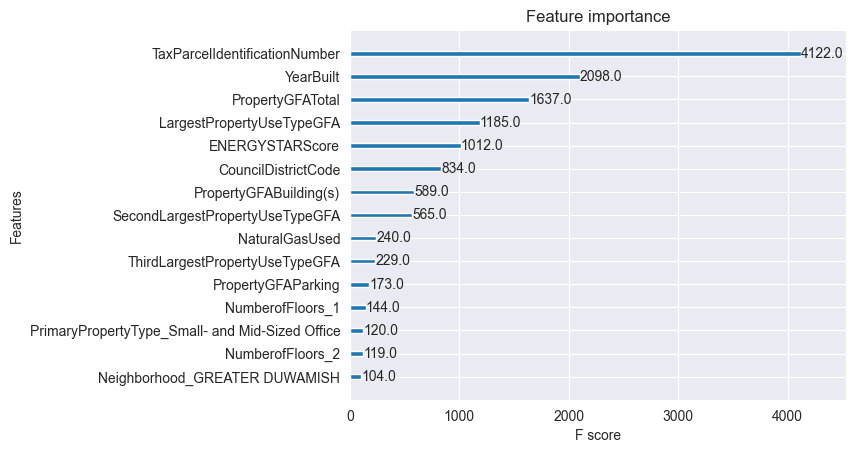

In [13]:
index = X.columns[:-1]
getBestModel(X_train, y_train, X_test, y_test, index)

In [14]:
index = X.columns
getBestModel(X_train_log ,y_train_log , X_test_log , y_test_log, index)

XGBoostError: [15:25:49] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\data\data.cc:507: Check failed: valid: Label contains NaN, infinity or a value too large.

In [ ]:
index = X.columns[:-1]
getBestModel(X_train_without_energy_score,y_train_without_energy_score, X_test_without_energy_score, y_test_without_energy_score, index)

le model avec l'E* est plus rapide et meilleur

# Conclusion : Choix du Modèle de Prédiction pour TotalGHGEmissions

En examinant ces résultats, nous pouvons conclure que le modèle **Xgboost** (avec ou sans Energy Star Score) semble être le meilleur choix pour la prédiction de notre variable cible, **TotalGHGEmissions**. Voici pourquoi :

- **Performance :** Le modèle Xgboost présente le RMSE le plus bas (47.17 avec Energy Star Score, 48.80 sans Energy Star Score) parmi tous les modèles testés, ce qui signifie qu'il fait les prédictions les plus proches des valeurs réelles de la consommation totale de gaz à effet de serre (TotalGHGEmissions).

- **MAPE :** Le modèle Xgboost a également le MAPE le plus bas (33.41 avec Energy Star Score, 32.77 sans Energy Star Score), ce qui indique qu'il a la plus faible erreur de pourcentage moyen par rapport aux autres modèles lorsqu'il s'agit de prédire TotalGHGEmissions.

- **R2 :** Le coefficient de détermination R2 est également élevé pour Xgboost (0.47 avec Energy Star Score, 0.44 sans Energy Star Score), ce qui signifie que ce modèle explique une grande proportion de la variance de la consommation totale de gaz à effet de serre.

- **Temps d'exécution :** Bien que le temps d'exécution de Xgboost soit plus élevé que certains autres modèles, il reste acceptable (0.42 secondes avec Energy Star Score, 0.74 secondes sans Energy Star Score) compte tenu de ses performances supérieures en prédiction de TotalGHGEmissions.

En conclusion, le modèle **Xgboost** est le choix recommandé pour prédire la consommation totale de gaz à effet de serre (TotalGHGEmissions) en raison de sa meilleure performance globale en termes de précision (RMSE et MAPE) et de sa capacité à expliquer la variance (R2), tout en maintenant un temps d'exécution raisonnable.
